In [1]:
from pylab import plot
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
def initialize():
    global Pc, Pl, Pn, alpha_CL, alpha_CN, alpha_LC, alpha_LN, alpha_NC, alpha_NL, rest_Pc, rest_Pl, rest_Pn
    
    Pc = 0.2
    Pl = 0.3
    Pn = 1 - Pc - Pl
    
    
    # Store results
    rest_Pc = [Pc]
    rest_Pl = [Pl]
    rest_Pn = [Pn]
    
def update():
    global Pc, Pl, Pn, alpha_CL, alpha_CN, alpha_LC, alpha_LN, alpha_NC, alpha_NL, rest_Pc, rest_Pl, rest_Pn
    
    # Calculate transition rates
    alpha_CL = 0.1 if Pl > Pc else 0
    alpha_CN = 0.3 if Pn > Pc else 0
    alpha_LC = 0.1 if Pc > Pl else 0
    alpha_LN = 0.1 if Pn > Pl else 0
    alpha_NC = 0.1 if Pc > Pn else 0
    alpha_NL = 0.15 if Pl > 0.5 * Pn else 0
    
    # Update ideological states
    next_Pc = Pc + (Pl * alpha_LC + Pn * alpha_NC) - Pc * (alpha_CL + alpha_CN)
    next_Pl = Pl + (Pc * alpha_CL + Pn * alpha_NL) - Pl * (alpha_LC + alpha_LN)
    next_Pn = Pn + (Pc * alpha_CN + Pl * alpha_LN) - Pn * (alpha_NC + alpha_NL)
    
    Pc = next_Pc
    Pl = next_Pl
    Pn = next_Pn
   
    
    
def observe():
    global Pc, Pl, Pn, rest_Pc, rest_Pl, rest_Pn
    
    # Store results
    rest_Pc.append(Pc)
    rest_Pl.append(Pl)
    rest_Pn.append(Pn)

In [3]:
initialize()

for _ in range(4):
    update()
    observe()

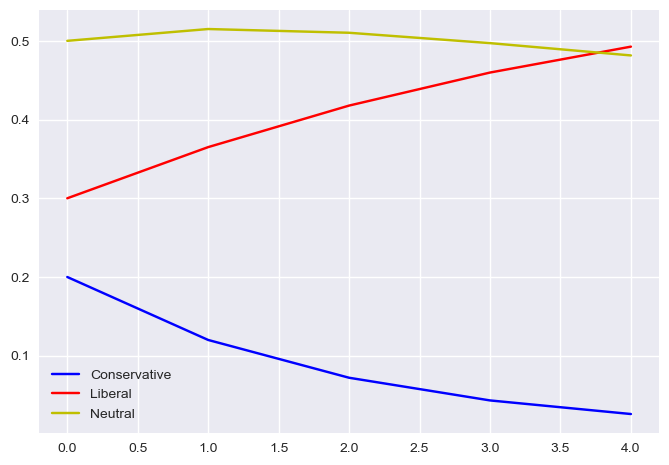

In [4]:
plot(rest_Pc, 'b-', label='Conservative')
plot(rest_Pl, 'r-', label='Liberal')
plot(rest_Pn, 'y-', label='Neutral')
plt.legend()
plt.show()

In [5]:
import pandas as pd

In [14]:
df = pd.DataFrame({ 'Coservative': rest_Pc, 'Neutral': rest_Pn, 'Liberal': rest_Pl})

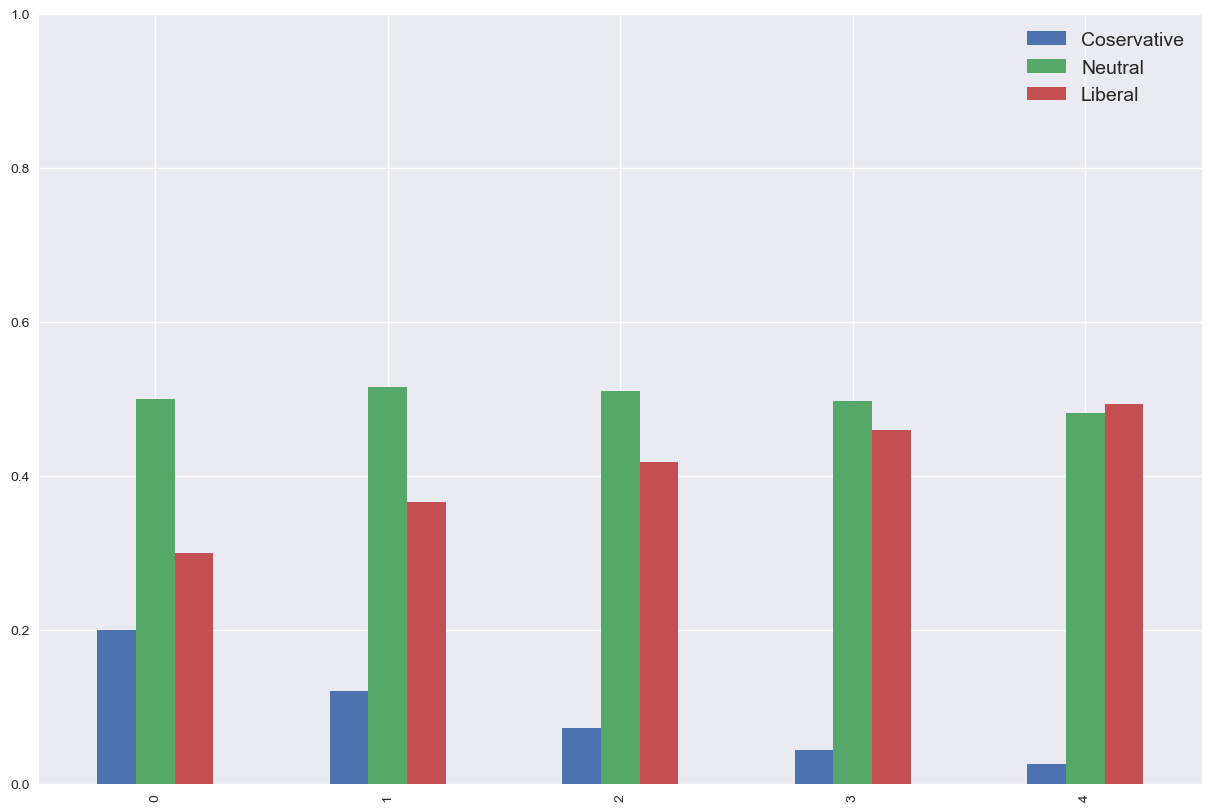

In [17]:
df.plot(kind='bar', figsize=(15, 10))
plt.ylim(0, 1)
plt.legend(loc='upper right', fontsize=14)
plt.savefig('popularities.png')
plt.show()